## Introduction

In America, automobile prices slightly fluctuate at all times throughout the year for various reasons, but significant changes in the automobile market can be analyzed and interpreted in order to determine the effects of large-scale events on the car market. Data on the automobile market is fairly extensive but is usually only compared when the cars are new and compared among each other to determine which car is superior in certain aspects. The goal of this project is to analyze used car data along with new car sales data to better understand the effects large scale events, especially the recent COVID-19 pandemic, on the car market and to see if any differences or trends in the analysis are noteworthy.

#### Why is this important?

Data from analyzing the car market is useful in determining what factors can affect the car market and finding any trends in both used and new cars sold. This information can be extremely important and helpful to both manufacturers in determining the best way to improve profits and to consumers in determining which car to purchase.

These are only some aspects of how data science is useful in the automobile industry, you can find some more information here: https://www.datacamp.com/community/blog/automotive-data-science

#### Goal

The goal of this tutorial will be to obtain used car information of previous years and sales data of recent years in order to generate graphs and models that can help visualize the direction and key aspects of automobile market in America 

## Data Collection

#### Used Car Data

To start this project, we will need to import some libraries in order to collect the necessary data. If any of these library packages are not installed already, just use following code to install them:

pip install {package name} 

In [1]:
import requests
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import lxml

Then we will download the used car csv data from kaggle.com, specifically https://www.kaggle.com/austinreese/craigslist-carstrucks-data. This data is raw postings of used cars from craigslist that needs to be modified/proccessed before we can reliably use it for data analyzing. 

We make use of Pandas and NumPy to manipulate our data in dataframes. Below is the documentation of these libraries that provide more in depth functionality notes:

Pandas: https://pandas.pydata.org/docs/index.html

NumPy: https://numpy.org/doc/stable/index.html


First, we read the data from vehicles.csv into a dataframe

In [2]:
df_used = pd.read_csv('vehicles.csv')
df_used

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


#### New Car Data

Next, we will scrape www.goodcarbadcar.net using the requests library in order to gain sales records of cars in 2019 and 2020 and up to Sept 2021. Use following header to act as a browser when making request in order to have access to the site to scrape data

In [3]:
URL = "https://www.goodcarbadcar.net/2020-us-vehicle-sales-figures-by-model/"
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
r = requests.get(URL, headers=header)

tables = pd.read_html(r.text,match="Model")
df2020 = tables[0]

In [4]:
URL = "https://www.goodcarbadcar.net/2019-us-vehicle-sales-figures-by-model/"
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
r = requests.get(URL, headers=header)

tables = pd.read_html(r.text,match="Model")
df2019 = tables[1]

In [5]:
URL = "https://www.goodcarbadcar.net/2021-us-vehicle-sales-figures-by-model/"
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
r = requests.get(URL, headers=header)

tables = pd.read_html(r.text,match="Model")
df2021 = tables[1]

## Data Processing

#### Used Car Data

We need to change the type of posting date to datetime, remove unnecessary columns, remove blank cells, and create a new column called supertype for better analysis
We accomplish all of this in the following code blocks.

In [6]:
# Vehicles Data:

# drop first 29 rows as they are junk
dfu = df_used.iloc[30:]

# keep only necessary columns of used vehicles data and rename manufacturer to make
dfu = dfu[['price','year','manufacturer','model','condition','fuel','transmission','type','state','posting_date']]
dfu = dfu.rename(columns={'manufacturer': 'Make', 'model': 'Model'})

# remove cells with NAN/blank for make, model, price, or year
# Note: There are nan conditions,these are probably cars that are in poor or average condition(bias), 
#       because sellers/posters would be more likely to include condition in posting if the car were in good or excellent condition

dfu.replace(r'^\s*$', np.nan, regex=True)
dfu = dfu[dfu['Make'].notna()]
dfu = dfu[dfu['Model'].notna()]
dfu = dfu[dfu['year'].notna()]
dfu.head()

,price,year,Make,Model,condition,fuel,transmission,type,state,posting_date
30,30990,2017.0,toyota,tundra double cab sr,good,gas,other,pickup,al,2021-05-04T10:41:31-0500
31,15000,2013.0,ford,f-150 xlt,excellent,gas,automatic,truck,al,2021-05-03T14:02:03-0500
32,27990,2012.0,gmc,sierra 2500 hd extended cab,good,gas,other,pickup,al,2021-05-03T13:41:25-0500
33,34590,2016.0,chevrolet,silverado 1500 double,good,gas,other,pickup,al,2021-05-03T12:41:33-0500
34,35000,2019.0,toyota,tacoma,excellent,gas,automatic,truck,al,2021-05-03T12:12:59-0500


In [7]:
# change the way posting date is stored to datetime objects so they are comparable (Long exectution time)
dfu['posting_date'] = dfu['posting_date'].apply(lambda x: pd.to_datetime(x))
print(dfu['posting_date'][200000])
print(type(dfu['posting_date'][200000]))

2021-04-04 21:54:57-04:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
# add supertype column to differentiate trucks, suvs, and cars
#SUV - SUV, minivan, wagon
#CAR - sedan, hatchback, coupe, convertible
#TRUCK - truck, pickup
#other - other, offroad, van, bus
#NAN - nan
dfu.loc[dfu["type"] == "SUV", "supertype"] = "SUV"
dfu.loc[dfu["type"] == "mini-van", "supertype"] = "SUV"
dfu.loc[dfu["type"] == "wagon", "supertype"] = "SUV"
dfu.loc[dfu["type"] == "sedan", "supertype"] = "CAR"
dfu.loc[dfu["type"] == "coupe", "supertype"] = "CAR"
dfu.loc[dfu["type"] == "hatchback", "supertype"] = "CAR"
dfu.loc[dfu["type"] == "convertible", "supertype"] = "CAR"
dfu.loc[dfu["type"] == "truck", "supertype"] = "TRUCK"
dfu.loc[dfu["type"] == "pickup", "supertype"] = "TRUCK"
dfu.loc[dfu["type"] == "other", "supertype"] = "OTHER"
dfu.loc[dfu["type"] == "offroad", "supertype"] = "OTHER"
dfu.loc[dfu["type"] == "van", "supertype"] = "OTHER"
dfu.loc[dfu["type"] == "bus", "supertype"] = "OTHER"
dfu.loc[dfu["type"] == np.nan, "supertype"] = np.nan
dfu.head()

,price,year,Make,Model,condition,fuel,transmission,type,state,posting_date,supertype
30,30990,2017.0,toyota,tundra double cab sr,good,gas,other,pickup,al,2021-05-04 10:41:31-05:00,TRUCK
31,15000,2013.0,ford,f-150 xlt,excellent,gas,automatic,truck,al,2021-05-03 14:02:03-05:00,TRUCK
32,27990,2012.0,gmc,sierra 2500 hd extended cab,good,gas,other,pickup,al,2021-05-03 13:41:25-05:00,TRUCK
33,34590,2016.0,chevrolet,silverado 1500 double,good,gas,other,pickup,al,2021-05-03 12:41:33-05:00,TRUCK
34,35000,2019.0,toyota,tacoma,excellent,gas,automatic,truck,al,2021-05-03 12:12:59-05:00,TRUCK


In [9]:
# Remove likely incorrect or impossible data points such as price being over 1 million and year being above 2021. 
# Also remove data that is too old to be relevent to current car pricing, which in this case will be quantified as any year 1990
dfu = dfu[dfu.year < 2022]
dfu = dfu[dfu.year > 1990]
dfu = dfu[dfu.price < 1000000]
dfu = dfu[dfu.price > 500]

# Remove any remaining outliers in price and year
q = dfu["price"].quantile(0.99)
dfu = dfu[dfu["price"] < q]
q = dfu["price"].quantile(0.01)
dfu = dfu[dfu["price"] > q]
q = dfu["year"].quantile(0.01)
dfu = dfu[dfu["year"] > q]

#### Sales Data

To process and clean the sales data, we need to remove junk rows, convert object type data into integers and strings and split up the car's name into its make and model. We will also be discarding the 2021 sales data past September, as those are still being uploaded and not completely accounted for. Currently, the data is formatted so that each row is a car, and each column is its monthly sales. Instead, we will be making each row a singular sale observation, so we will need to melt the data. Finally, we will merge all of the sales data into one master dataframe.

In [10]:
# Sales Data:

# Last 2 rows need to be dropped as they are sum of sales and nans
df2019 = df2019.iloc[:-2]
df2020 = df2020.iloc[:-2]
df2021 = df2021.iloc[:-2]

# remove oct-dec columns of the 2021 data set as they are still in progress of being uploaded
df2021 = df2021[df2021.columns[:10]]

# Convert sales data types from objects to integers
df2019['Jan'] = pd.to_numeric(df2019['Jan']);
df2019['Feb'] = pd.to_numeric(df2019['Feb']);
df2019['Mar'] = pd.to_numeric(df2019['Mar']);
df2019['Apr'] = pd.to_numeric(df2019['Apr']);
df2019['May'] = pd.to_numeric(df2019['May']);
df2019['Jun'] = pd.to_numeric(df2019['Jun']);
df2019['Jul'] = pd.to_numeric(df2019['Jul']);
df2019['Aug'] = pd.to_numeric(df2019['Aug']);
df2019['Sep'] = pd.to_numeric(df2019['Sep']);
df2019['Oct'] = pd.to_numeric(df2019['Oct']);
df2019['Nov'] = pd.to_numeric(df2019['Nov']);
df2019['Dec'] = pd.to_numeric(df2019['Dec']);
df2020['Jan'] = pd.to_numeric(df2020['Jan']);
df2020['Feb'] = pd.to_numeric(df2020['Feb']);
df2020['Mar'] = pd.to_numeric(df2020['Mar']);
df2020['Apr'] = pd.to_numeric(df2020['Apr']);
df2020['May'] = pd.to_numeric(df2020['May']);
df2020['Jun'] = pd.to_numeric(df2020['Jun']);
df2020['Jul'] = pd.to_numeric(df2020['Jul']);
df2020['Aug'] = pd.to_numeric(df2020['Aug']);
df2020['Sep'] = pd.to_numeric(df2020['Sep']);
df2020['Oct'] = pd.to_numeric(df2020['Oct']);
df2020['Nov'] = pd.to_numeric(df2020['Nov']);
df2020['Dec'] = pd.to_numeric(df2020['Dec']);
df2021['Jan'] = pd.to_numeric(df2021['Jan']);
df2021['Feb'] = pd.to_numeric(df2021['Feb']);
df2021['Mar'] = pd.to_numeric(df2021['Mar']);
df2021['Apr'] = pd.to_numeric(df2021['Apr']);
df2021['May'] = pd.to_numeric(df2021['May']);
df2021['Jun'] = pd.to_numeric(df2021['Jun']);
df2021['Jul'] = pd.to_numeric(df2021['Jul']);
df2021['Aug'] = pd.to_numeric(df2021['Aug']);
df2021['Sep'] = pd.to_numeric(df2021['Sep']);

# Add year columns for later differentiation
df2019['year'] = 2019
df2020['year'] = 2020
df2021['year'] = 2021

# Combine all three dataframes
frames = [df2019, df2020]
df19a20 = pd.concat(frames, ignore_index=True)
colnames = df19a20.columns.tolist()
colnames = [colnames[0]] + colnames[-1:] + colnames[1:-1]
df19a20 = df19a20[colnames]

# Check for blank cells and create NAN
df19a20.replace(r'^\s*$', np.nan, regex=True)
df19a20.replace(0, np.nan, regex=True)


# Change goodcarbadcar data model column to 'make' and 'model' seperate columns
df19a20[['Make', 'Model']] = df19a20['Model'].str.split(' ', 1, expand=True)
colnames = df19a20.columns.tolist()
colnames = colnames[-1:] + colnames[:-1]
df19a20 = df19a20[colnames]
df19a20.loc[(df19a20.Make == 'Alfa'),'Make']='Alfa Romeo'
df19a20.loc[(df19a20.Make == 'Alfa Romeo'),'Model']= df19a20['Model'].str.split(n=1).str[1]
df19a20.loc[(df19a20.Make == 'Land'),'Make']='Land Rover'
df19a20.loc[(df19a20.Make == 'Land Rover'),'Model']= df19a20['Model'].str.split(n=1).str[1]

# Quantify and melt the months into rows
df_sales_master = df19a20
df19a20 = df19a20.rename(columns={'Jan': '1', 'Feb': '2', 'Mar': '3', 'Apr': '4', 'May': '5', 'Jun': '6', 'Jul': '7', 'Aug': '8', 'Sep': '9', 'Oct': '10', 'Nov': '11', 'Dec': '12'})
df19a20 = pd.melt(df19a20, id_vars=['Make', 'Model', 'year'])

# Create a date column that formats the year and month into the datetime format
df19a20.insert(2, 'date', (df19a20[['year', 'variable']].astype(str).agg('-'.join, 1)), True)
df19a20['date'] = pd.to_datetime(df19a20['date'], format='%Y-%m').dt.strftime('%Y-%m')
df19a20 = df19a20.rename(columns={'value': 'sales'})
df19a20 = df19a20.drop(columns=['year', 'variable'])

In [11]:
# Perform the same changes on the 2021 data separately as it has a different number of columns

# Splitting
df2021[['Make', 'Model']] = df2021['Model'].str.split(' ', 1, expand=True)
colnames = df2021.columns.tolist()
colnames = colnames[-1:] + colnames[:-1]
df2021 = df2021[colnames]
df2021.loc[(df2021.Make == 'Alfa'),'Make']='Alfa Romeo'
df2021.loc[(df2021.Make == 'Alfa Romeo'),'Model']= df2021['Model'].str.split(n=1).str[1]
df2021.loc[(df2021.Make == 'Land'),'Make']='Land Rover'
df2021.loc[(df2021.Make == 'Land Rover'),'Model']= df2021['Model'].str.split(n=1).str[1]

# Melting
df2021 = df2021.rename(columns={'Jan': '1', 'Feb': '2', 'Mar': '3', 'Apr': '4', 'May': '5', 'Jun': '6', 'Jul': '7', 'Aug': '8', 'Sep': '9'})
df2021 = pd.melt(df2021, id_vars=['Make', 'Model', 'year'])
df2021.insert(2, 'date', (df2021[['year', 'variable']].astype(str).agg('-'.join, 1)), True)
df2021['date'] = pd.to_datetime(df2021['date'], format='%Y-%m').dt.strftime('%Y-%m')
df2021 = df2021.rename(columns={'value': 'sales'})
df2021 = df2021.drop(columns=['year', 'variable'])

frames = [df19a20, df2021]
df_sales_master = pd.concat(frames)

# Sort dataframe by date
df_sales_master = df_sales_master.sort_values(by='date')

# Reset index
df_sales_master = df_sales_master.reset_index(drop=True)
df_sales_master

df_sales_master

,Make,Model,date,sales
0,Acura,ILX,2019-01,805
1,Mercedes-Benz,AMG GT,2019-01,83
2,Mercedes-Benz,A-Class,2019-01,0
3,Mazda,MX-5 Miata,2019-01,347
4,Mazda,CX-9,2019-01,1860
...,...,...,...,...
9994,Ford,GT,2021-09,10
9995,Ford,Fusion,2021-09,42
9996,Ford,F-Series,2021-09,63164
9997,Ford,Transit,2021-09,9939


## Exploratory Analysis

#### Used Car Data: Visualizing  the Price of Used Cars Over Time

<AxesSubplot:title={'center':'Price of Used Car Listings Over Time'}, xlabel='year', ylabel='Price'>

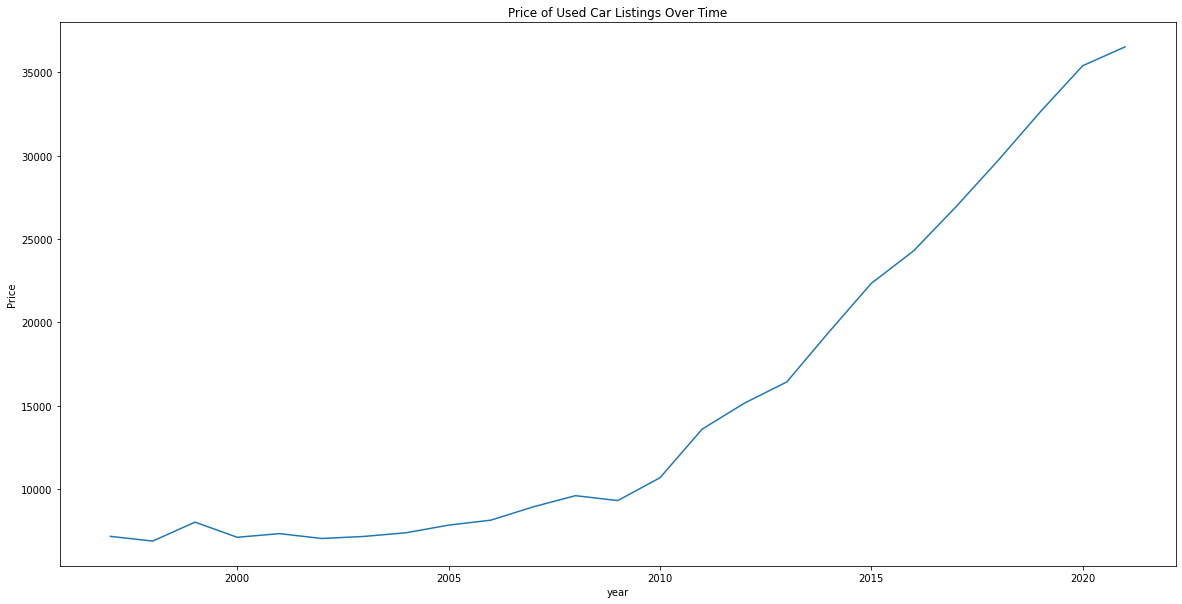

In [12]:
means = (dfu.groupby('year'))['price'].mean()
plt.figure(1, figsize=(20, 10))
means.plot(title = 'Price of Used Car Listings Over Time', ylabel = 'Price')

Looking at the average price of a used car posting per year, I expected an increase in price per year, but did not expect the average prices to be so high in the recent years. 2019 used car postings average price is above 30,000 dollars which seems very high for a used car. 

#### New Car Data: Visualizing Sales Over Time

Now that we have our data properly processed, let's take a look at some charts to explore some unique characteristics of this dataset. The first chart with this dataset will visualize the sales data for new cars from 2019 until September of 2021.

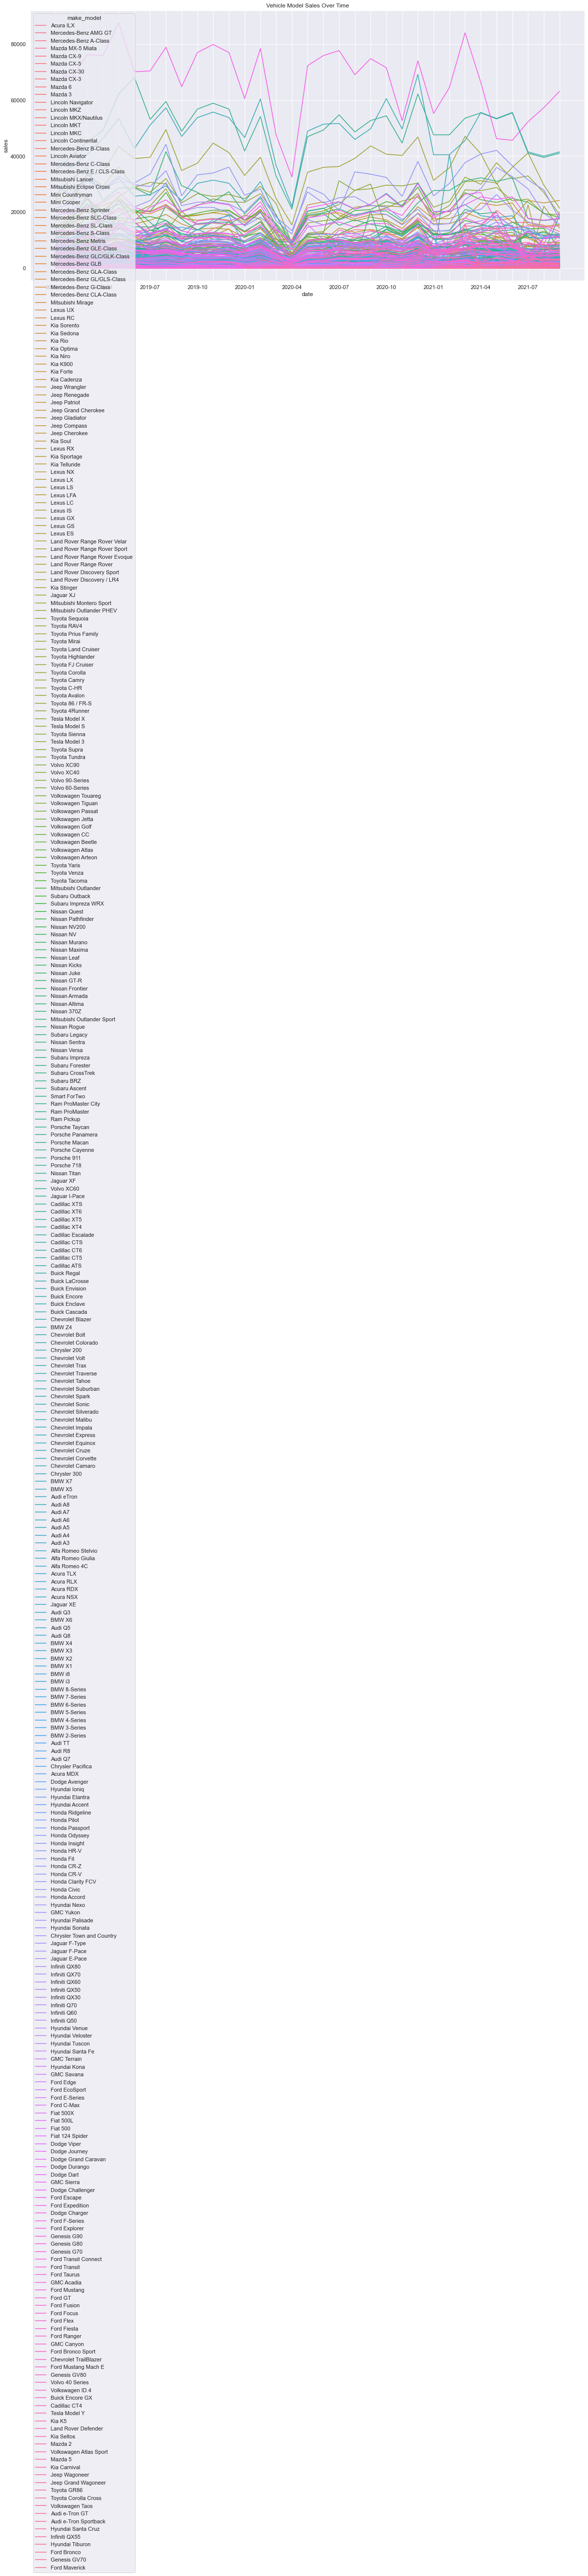

In [13]:
# Combine Make and Model for the legend
df_sales_master_temp = df_sales_master.copy()
df_sales_master_temp['make_model'] = df_sales_master_temp['Make'] + ' ' + df_sales_master_temp['Model']

# Plot
sb.set(rc={'figure.figsize':(20,10)})
model_sale_plot = sb.lineplot(data=df_sales_master_temp, x='date', y='sales', hue='make_model')
model_sale_plot.set_title('Vehicle Model Sales Over Time')

# Reduce x ticks
for ind, label in enumerate(model_sale_plot.get_xticklabels()):
    if ind % 3 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

From this graph, we can see that the Ford F-Series is consistently the most sold vehicle in the U.S. We can also see that there was a major dip in most vehicle sales in March and April of 2020, especially for the highest selling vehicles. This was about the time that the quarantine started and COVID-19 was officially recognized as a Pandemic and National Emergency. 

More about that timeline can be found here: https://www.ajmc.com/view/a-timeline-of-covid19-developments-in-2020


Unfortunately, because of the sheer volume of data, it is difficult to discern the sales data of each individual car, especially for vehicles with lower sales. So, let's aggregate the data and see the total sales data for each individual brand over time.

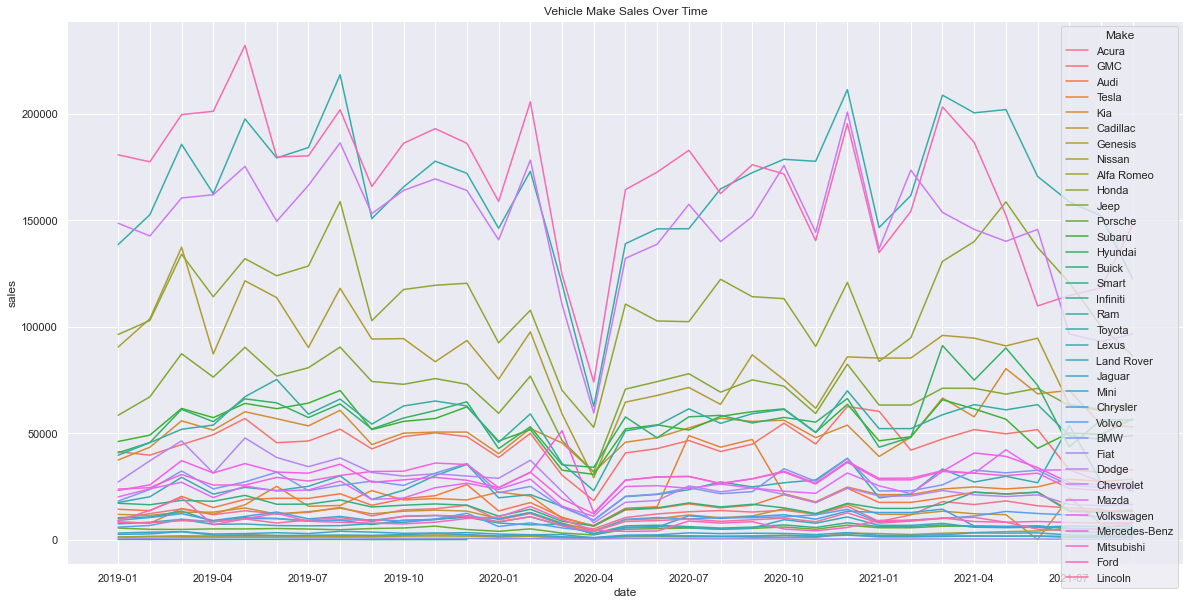

In [14]:
# Create new rows that sums the total sales of each Make
df_sales_master_makes = df_sales_master.copy()
df_sales_master_makes = df_sales_master_makes.groupby(['Make', 'date'], as_index=False).sum()
df_sales_master_makes

# Sort dataframe by date
df_sales_master_makes = df_sales_master_makes.sort_values(by='date')

# Plot
sb.set(rc={'figure.figsize':(20,10)})
make_sale_plot = sb.lineplot(data=df_sales_master_makes, x='date', y='sales', hue='Make')
make_sale_plot.set_title('Vehicle Make Sales Over Time')

# Reduce x ticks
for ind, label in enumerate(make_sale_plot.get_xticklabels()):
    if ind % 3 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

From this graph, we can see that Ford, Toyota, Chevrolet, Honda, and Nissan are consistently the top 5 best-selling automotive brands in the U.S. It is also clear that the sales dip in March and April of 2020 affected pretty much every brand. Because this difference is so apparent in these higher selling brands, and the sheer volume of their sales  make many other brands' sales indiscernible, it might be a good idea to focus on just these 5 major brands.

In [15]:
# Create dataframe of sales data of 5 major brands
df_top5sales = df_sales_master_makes.copy()
df_top5sales = df_top5sales[df_top5sales['Make'].isin(['Ford','Toyota','Chevrolet','Honda','Nissan'])]
df_top5sales

,Make,date,sales
858,Nissan,2019-01,90439
429,Honda,2019-01,96375
1035,Toyota,2019-01,138601
198,Chevrolet,2019-01,148602
330,Ford,2019-01,180766
...,...,...,...
362,Ford,2021-09,147737
230,Chevrolet,2021-09,96612
890,Nissan,2021-09,63548
461,Honda,2021-09,86303


## Regression and Analysis

#### New Car Data: Predicting Future Sales

Next, we will attempt to predict 2021 sales data using the 2019 and 2020 sales data. We will use linear regression to achieve this. Additionally, because each company only has one sale volume for each time period, and because the data we have is unnaturally affected by covid, we lack enough data to make accurate predictions for each company. Instead, we will predict average sale volume for 2021, and compare our results to the average of the real 2021 sale volume. We will focus only the 5 major brands discussed previously, and this way we will have a large enough sample size for the result to be considered statistically significant, while also reducing the variation of the data.

Now, let's generate a linear regression. First, we have to quantify the date into a numeric format, so that it can be used as X in our regression. We will use decimal years for each month, such as 2019.5 for June of 2019.

In [16]:
# Create new column to store quantified date
df_sales_master_temp2 = df_top5sales.copy()
df_sales_master_temp2['date_quant'] = 0.0

# Quantify date
for index, row in df_sales_master_temp2.iterrows():
    yr = int(row['date'][0:4])
    mo = int(row['date'][5:7])
    dq = yr + (mo-1)/12
    df_sales_master_temp2.at[index, 'date_quant'] = dq

df_sales_master_temp2

,Make,date,sales,date_quant
858,Nissan,2019-01,90439,2019.000000
429,Honda,2019-01,96375,2019.000000
1035,Toyota,2019-01,138601,2019.000000
198,Chevrolet,2019-01,148602,2019.000000
330,Ford,2019-01,180766,2019.000000
...,...,...,...,...
362,Ford,2021-09,147737,2021.666667
230,Chevrolet,2021-09,96612,2021.666667
890,Nissan,2021-09,63548,2021.666667
461,Honda,2021-09,86303,2021.666667


Next, we generate the regression using the new quantified dates and the sales. We will use linear regression using the least squares function (ols), from the stats library. Because we are using the 2019 and 2020 data to predict 2021 data, the master dataframe can be used for training.

In [17]:
# Predict Average sales
sale_reg = smf.ols(formula="sales ~ date_quant", data=df_sales_master_temp2[df_sales_master_temp2['date_quant'] < 2021]).fit()
sale_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.449
Date:                Mon, 20 Dec 2021   Prob (F-statistic):             0.0658
Time:                        22:26:47   Log-Likelihood:                -1449.3
No. Observations:                 120   AIC:                             2903.
Df Residuals:                     118   BIC:                             2908.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.561e+07   1.37e+07      1.867      0.064   -1.55e+06    5.28e+07
date_quant -1.261e+04   6789.153     -1.857      0.066   -2.61e+04     835.977
==============================================================================
Omnibus:                       10.163   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.233
Skew:                          -0.166   Prob(JB):                        0.120
Kurtosis:                       2.142   Cond. No.                     7.07e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Unfortunately, from the model summary, we can see that the p-value, noted by the P>|t| column, is just shy of 0.05. A p-value that is less than or equal to 0.05 signifies that there is strong evidence of a correlation, but unfortunately, we were only able to obtain a p-value of 0.06.

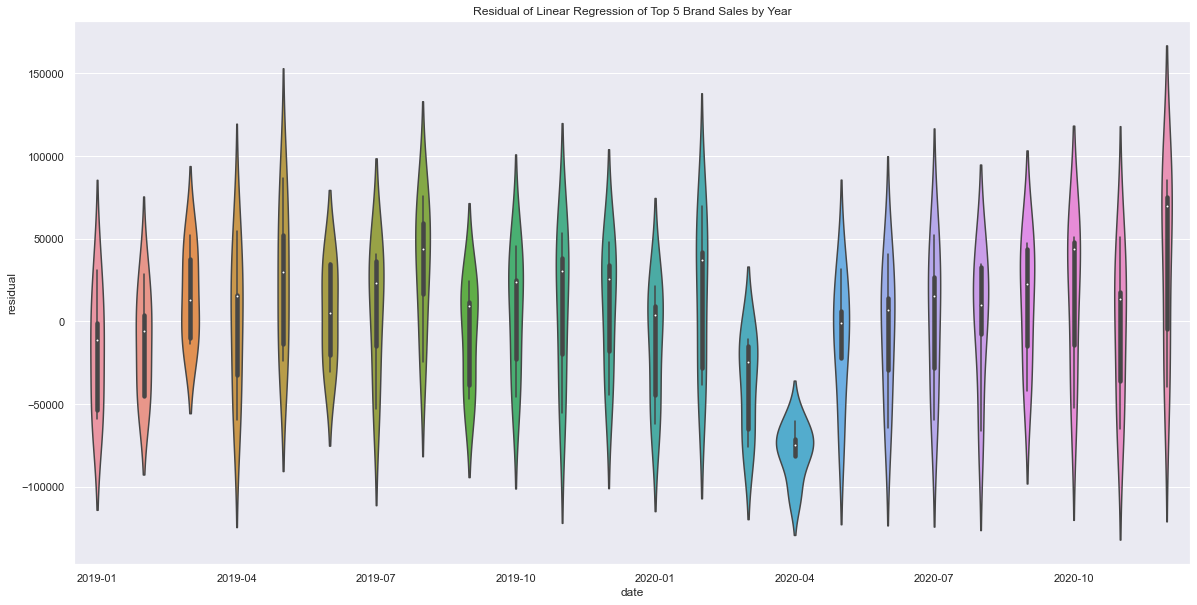

In [18]:
# Plot residuals against time
df_sales_master_temp2['residual'] = np.nan
df_sales_master_temp2['residual'] = sale_reg.resid
sale_resid_plot = sb.violinplot(x='date', y='residual', data=df_sales_master_temp2[df_sales_master_temp2['date_quant'] < 2021])
sale_resid_plot.set_title("Residual of Linear Regression of Top 5 Brand Sales by Year")
for ind, label in enumerate(sale_resid_plot.get_xticklabels()):
    if ind % 3 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

We can see in the residuals that most of the sales data varies significantly as each brand in the top 5 generally performs at its own level, such as how Ford always has much better sales numbers than Nissan. However, the residual for April 2020 is much smaller and tighter, while also being the farthest away from 0, demonstrating how unusual the sales figures were at the peak of the pandemic. Normally, we would want to remove such an outlier to improve the regression, however, removing the April 2020 sales data would reduce the statistical significance of the regression as it has comparativley much less variance than the sales at other dates.

Next, we will compare the predictions made from the regression to the real 2021 data.

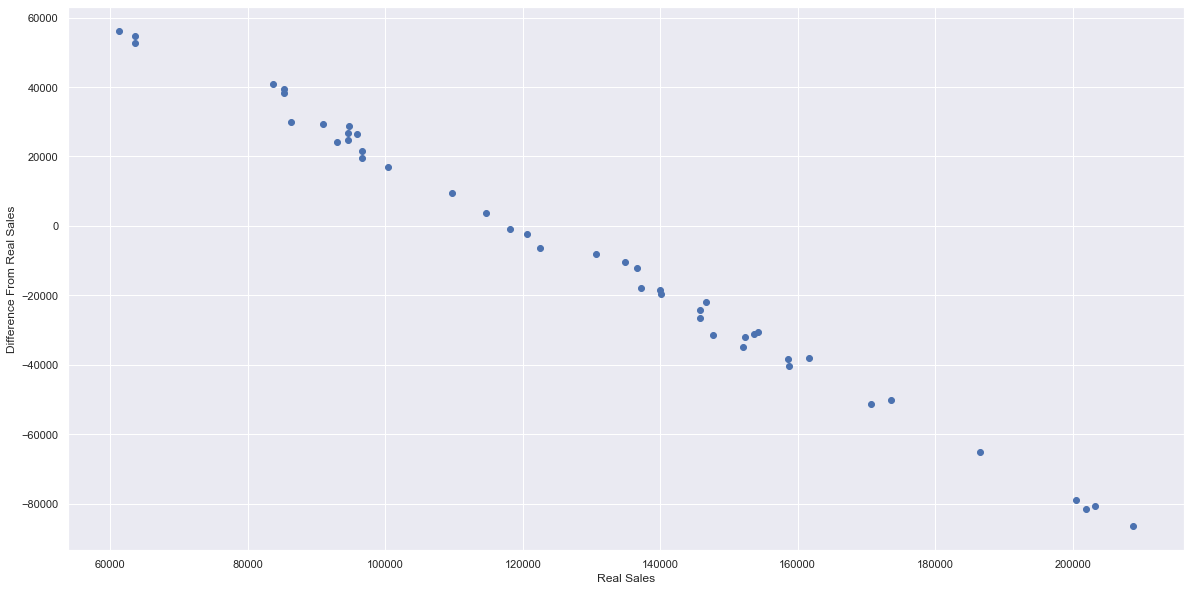

In [19]:
# Restrict data to greater than 2021
predictions = sale_reg.predict(df_sales_master_temp2[df_sales_master_temp2['date_quant'] >= 2021])
diff = predictions - df_sales_master_temp2[df_sales_master_temp2['date_quant'] >= 2021]['sales']

# Plot
plt.scatter(df_sales_master_temp2[df_sales_master_temp2['date_quant'] >= 2021]['sales'], diff)
plt.xlabel('Real Sales')
plt.ylabel('Difference From Real Sales')
plt.show()

As we can see from the plot, the predictions unfortunately don't correlate well with reality. However, this is to be expected, as we saw massive volatility in sales in the initial exploratory graphs in 2021. Unfortunately, this regression doesn't fit well with this data, however, it would likely perform much better with a dataset that includes total sales for each year rather than for each month, as there would likely be much less volatility, and a model would be able to make a proper prediction.

Additionally, the regression predicted that sales would likely increase based on previous sales, even though the pandemic caused a major dip in sales. Although this is the opposite of what has happened so far, it is likely that sales will continue to steadily go up in the future and for the year as a whole as long as another pandemic doesn't hit us.


In [20]:
print(predictions.mean())
print(predictions.std())
print(diff.mean())
print(diff.std())
print(df_sales_master_temp2[df_sales_master_temp2['date_quant'] >= 2021]['sales'].mean())
print(df_sales_master_temp2[df_sales_master_temp2['date_quant'] >= 2021]['sales'].std())

120374.4655072338
2743.5497614035226
-8833.090048321768
38636.47642455955
129207.55555555556
39336.760634964914


The average for the predictions were relatively close to the average for the real 2021 sales. Additionally, we can see how volatile the real sales are with its massive standard deviation in comparison to the standard deviation of the predictions. This kind of regression would do much better with average sales, likely because of how varying the sales of each brand is.

#### Used Car Data: Predict The Cost of a Used Car

With the information in the vehicles data, we can predict the price of a used car based on its variables such as year, make, and supertype(car, truck, SUV, other). This is accomplished through multivariable linear regression with least squares that is available in the statsmodel library. The regression will be generated by using 90 percent of the data for training and the other 10 percent for testing.

In [21]:
# predict cost of used car based on make, supertype, and year using multivariable linear regression with least squares
# Train with 80 percent of data and predict with remaining 20 percent

part_90 = dfu.sample(frac = 0.90, random_state=1)
rest_part_10 = dfu.drop(part_90.index)

model = smf.ols(formula="price ~ year * Make * supertype", data=part_90).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     1643.
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:27:00   Log-Likelihood:            -2.5609e+06
No. Observations:              247199   AIC:                         5.122e+06
Df Residuals:                  246919   BIC:                         5.125e+06
Df Model:                         279                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                       -2.834e+06    6.6e+04    -42.927      0.000   -2.96e+06    -2.7e+06
Make[T.alfa-romeo]                              -1.715e+06   8.08e+05     -2.122      0.034    -3.3e+06   -1.31e+05
Make[T.aston-martin]                             1.068e+07   1.08e+06      9.923      0.000    8.57e+06    1.28e+07
Make[T.audi]                                    -1.708e+06    8.9e+04    -19.179      0.000   -1.88e+06   -1.53e+06
Make[T.bmw]                                     -6.011e+05   7.62e+04     -7.890      0.000    -7.5e+05   -4.52e+05
Make[T.buick]                                    8.484e+05   9.93e+04      8.546      0.000    6.54e+05    1.04e+06
Make[T.cadillac]                                -8.827e+05   8.65e+04    -10.209      0.000   -1.05e+06   -7.13e+05
Make[T.chevrolet]                                1.381e+06   7.38e+04     18.705      0.000    1.24e+06    1.53e+06
Make[T.chrysler]                                 4.573e+05   9.29e+04      4.924      0.000    2.75e+05    6.39e+05
Make[T.dodge]                                   -1.244e+06   9.19e+04    -13.542      0.000   -1.42e+06   -1.06e+06
Make[T.ferrari]                                  3.316e+06   4.72e+06      0.703      0.482   -5.93e+06    1.26e+07
Make[T.fiat]                                    -1.428e+06   3.38e+05     -4.222      0.000   -2.09e+06   -7.65e+05
Make[T.ford]                                     4.061e+05   7.38e+04      5.505      0.000    2.61e+05    5.51e+05
Make[T.gmc]                                      3.424e+05   7.83e+05      0.437      0.662   -1.19e+06    1.88e+06
Make[T.harley-davidson]                          2.152e+06   8.38e+05      2.568      0.010     5.1e+05     3.8e+06
Make[T.honda]                                    5.069e+05   7.35e+04      6.896      0.000    3.63e+05    6.51e+05
Make[T.hyundai]                                  3.972e+05   8.79e+04      4.518      0.000    2.25e+05    5.69e+05
Make[T.infiniti]                                -8.486e+05   9.46e+04     -8.966      0.000   -1.03e+06   -6.63e+05
Make[T.jaguar]                                  -4.646e+04   1.12e+05     -0.416      0.677   -2.65e+05    1.72e+05
Make[T.jeep]                                    -3.376e+05   1.93e+05     -1.751      0.080   -7.15e+05    4.02e+04
Make[T.kia]                                     -1.978e+05   1.12e+05     -1.770      0.077   -4.17e+05    2.12e+04
Make[T.land rover]                              -5.217e+05   6.45e+05     -0.809      0.418   -1.79e+06    7.42e+05
Make[T.lexus]                                   -5.879e+05   8.29e+04     -7.092      0.000    -7.5e+05   -4.25e+05
Make[T.lincoln]                                     -4e+05   9.37e+

From the model summary, we can see that these variables are a good indicator of price as their p-values, noted by the P>|t| column, are mostly 0 to 0.05 for each individual component of each variable suggesting that their impact on price is different from a 0-coefficient value. There are some NAN components but that is mostly just makes that don't contain certain supertypes, which is not ideal but fine since then the price will be predicted based on the variables separately making it less accurate but still within a certain range. However, the worst indicator for price seems to be the TRUCK supertype as all its p-values are very large, nearly 1. We can test this effect by running both with and without the supertype truck for our predictions.

In [22]:
dfuT = dfu[dfu['supertype'] != 'TRUCK']
part_90T = dfuT.sample(frac = 0.90, random_state=1)
rest_part_10T = dfu.drop(part_90T.index)

model2 = smf.ols(formula="price ~ year * Make * supertype", data=part_90T).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     1404.
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:27:08   Log-Likelihood:            -1.9605e+06
No. Observations:              190453   AIC:                         3.921e+06
Df Residuals:                  190227   BIC:                         3.924e+06
Df Model:                         225                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                       -2.824e+06   6.13e+04    -46.041      0.000   -2.94e+06    -2.7e+06
Make[T.alfa-romeo]                              -1.573e+06   7.56e+05     -2.079      0.038   -3.05e+06   -9.04e+04
Make[T.aston-martin]                             7.414e+06   7.15e+05     10.376      0.000    6.01e+06    8.81e+06
Make[T.audi]                                    -1.681e+06   8.27e+04    -20.324      0.000   -1.84e+06   -1.52e+06
Make[T.bmw]                                     -6.243e+05    7.1e+04     -8.791      0.000   -7.63e+05   -4.85e+05
Make[T.buick]                                    8.319e+05   9.24e+04      9.000      0.000    6.51e+05    1.01e+06
Make[T.cadillac]                                -8.948e+05   8.04e+04    -11.123      0.000   -1.05e+06   -7.37e+05
Make[T.chevrolet]                                1.389e+06   6.87e+04     20.210      0.000    1.25e+06    1.52e+06
Make[T.chrysler]                                 4.368e+05   8.64e+04      5.057      0.000    2.67e+05    6.06e+05
Make[T.dodge]                                   -1.305e+06   8.61e+04    -15.163      0.000   -1.47e+06   -1.14e+06
Make[T.ferrari]                                  3.306e+06   4.42e+06      0.749      0.454   -5.35e+06     1.2e+07
Make[T.fiat]                                    -1.493e+06   3.24e+05     -4.604      0.000   -2.13e+06   -8.57e+05
Make[T.ford]                                     3.627e+05   6.87e+04      5.281      0.000    2.28e+05    4.97e+05
Make[T.gmc]                                      1.873e+05   7.36e+05      0.254      0.799   -1.26e+06    1.63e+06
Make[T.harley-davidson]                          2.336e+06   3.01e+05      7.759      0.000    1.75e+06    2.93e+06
Make[T.honda]                                    4.981e+05   6.84e+04      7.286      0.000    3.64e+05    6.32e+05
Make[T.hyundai]                                  3.704e+05   8.19e+04      4.524      0.000     2.1e+05    5.31e+05
Make[T.infiniti]                                -8.663e+05   8.86e+04     -9.779      0.000   -1.04e+06   -6.93e+05
Make[T.jaguar]                                  -4.254e+04   1.06e+05     -0.403      0.687    -2.5e+05    1.65e+05
Make[T.jeep]                                    -4.016e+05   1.78e+05     -2.258      0.024    -7.5e+05    -5.3e+04
Make[T.kia]                                      -1.73e+05   1.03e+05     -1.675      0.094   -3.75e+05    2.94e+04
Make[T.land rover]                               -5.29e+05   6.27e+05     -0.843      0.399   -1.76e+06    7.01e+05
Make[T.lexus]                                    -5.77e+05    7.7e+04     -7.495      0.000   -7.28e+05   -4.26e+05
Make[T.lincoln]                                 -3.492e+05   8.67e+

The F statistic of our first model seems much higher than the one of model 2, therefore our first model was better for testing. The F values can be determined through the following code.

In [23]:
print(model.fvalue)
print(model2.fvalue)

1642.8343429735507
1404.1296173401522


Now we will plot residuals of our models.

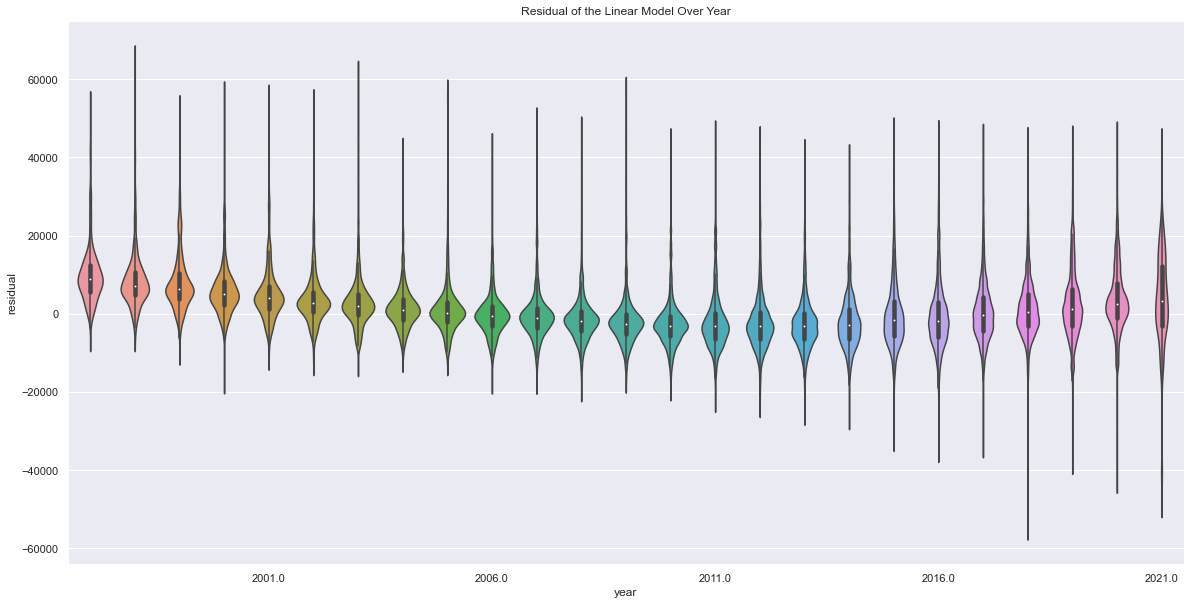

In [24]:
dfu['residual'] = model.resid
ax = sb.violinplot(x='year', y='residual', data=dfu)
ax.set_title("Residual of the Linear Model Over Year")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 4:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

From the residuals we can see that as the year increases, the residuals are closer to zero which is ideal, but the variance in the residuals is still very high suggesting that the model is not able to accurately represent the high variance in the data itself. 

Next, we test our regression model with the remaining 10 percent of data.

Text(0, 0.5, 'Difference from Estimated')

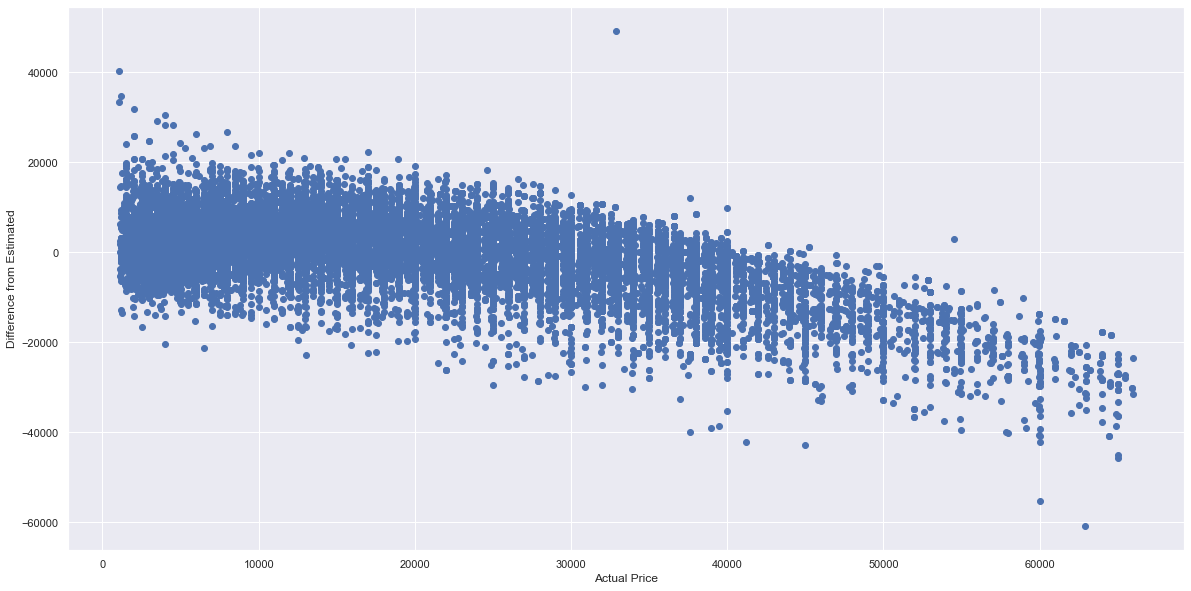

In [25]:
predictions = model.predict(rest_part_10)
predictions
diff = predictions - rest_part_10['price']

plt.scatter(rest_part_10['price'], diff)
plt.xlabel('Actual Price')
plt.ylabel('Difference from Estimated')

On average, how far off we are on our estimates from the actual price is -11.4 with a standard deviation of 7571.3. The price mean is 19088.03 with a standard deviation of 13045.16. Considering these factors, most of our estimates are good since at least 68% of them are within 8,000 of the actual price which is less than 1 standard deviation of the price. These values can be calculated from the following code block.

In [26]:
print(diff.mean())
print(diff.std())
print(dfu['price'].mean())
print(dfu['price'].std())

-11.423551396919807
7571.297427781543
19088.847586472348
13045.07653305824


The biggest difference in our estimated versus the actual price was -60778.3. This corresponds to the 2005 dodge viper convertible which still hold a high value in comparisons to other cars in that make and year because its been discontinued and the only way to get one is by buying a used version. Its original MSRP was $81k according to cars.com. These statistics can be seen through the following code.

In [27]:
print(diff.min())
print(rest_part_10.loc[diff.idxmin()])

-60778.30637697792
price                               62900
year                               2005.0
Make                                dodge
Model                   viper convertible
condition                        like new
fuel                                  gas
transmission                       manual
type                                coupe
state                                  ga
posting_date    2021-05-04 10:21:09-04:00
supertype                             CAR
Name: 121563, dtype: object


#### Used Car Data: Price vs Posting Date

We can also check how the prices of the same make and model car changes over later posting dates. First, we need to groupby the make, model, and year of a car and limit the rows to only rows that contain more than 1 posting date.

In [28]:
# Change in price compared to change in posting date
gp = dfu.groupby(['Make', 'Model', "year"])[['posting_date', 'price']].agg(list).reset_index()
test = gp.price.apply(lambda x: len(x) > 1)
gp = gp[test]
gp

,Make,Model,year,posting_date,price
2,acura,3.2 cl type s,2003.0,"[2021-04-29 21:03:12-04:00, 2021-04-24 11:04:0...","[9999, 6000, 5950, 9999, 9999]"
3,acura,3.2 tl,2000.0,"[2021-05-04 09:40:31-07:00, 2021-04-23 13:14:3...","[3000, 2300]"
5,acura,3.2 tl,2003.0,"[2021-04-13 22:56:14-07:00, 2021-04-30 07:07:3...","[5500, 5995, 1299]"
6,acura,3.2 tl,2004.0,"[2021-05-03 15:22:49-06:00, 2021-04-30 10:02:1...","[2300, 4500]"
7,acura,3.2 tl,2005.0,"[2021-05-01 10:39:28-05:00, 2021-04-27 11:10:2...","[4500, 5000, 3200]"
...,...,...,...,...,...
45495,volvo,xc90 t6 momentum sport,2017.0,"[2021-05-03 14:11:31-07:00, 2021-05-03 14:51:2...","[36990, 36990, 36990, 36990, 36990]"
45498,volvo,xc90 t6 r design awd gas,2016.0,"[2021-05-02 12:45:55-06:00, 2021-04-25 17:53:0...","[33999, 33999, 33999, 33999, 33999]"
45499,volvo,xc90 t8 hybrid inscription,2019.0,"[2021-05-03 20:09:35-07:00, 2021-05-03 16:03:3...","[35000, 35000, 33000, 33000, 35000, 35000]"
45501,volvo,xc90 v8,2008.0,"[2021-04-27 16:57:56-07:00, 2021-04-17 17:54:4...","[8995, 5900]"


Then we can determine the change in price from the first posting date and last posting date over time by using the slope from those two points. We can generate a new column called slope to hold this value.

In [29]:
gp = gp.reset_index()
gp['slope'] = 0
for i in range(len(gp)):
    slope = 0
    last = len(gp['price'][i])-1
    maxd = max(gp['posting_date'][i]).date()
    indmax = gp['posting_date'][i].index(maxd)
    mind = min(gp['posting_date'][i]).date()
    indmin = gp['posting_date'][i].index(mind)
    diff = ((maxd - mind).days)
    if diff == 0:
        diff = .1
    slope = (gp['price'][i][indmax] - gp['price'][i][indmin]) / diff
    gp['slope'][i] = slope
gp.head()

,index,Make,Model,year,posting_date,price,slope
0,2,acura,3.2 cl type s,2003.0,"[2021-04-29 21:03:12-04:00, 2021-04-24 11:04:0...","[9999, 6000, 5950, 9999, 9999]",399
1,3,acura,3.2 tl,2000.0,"[2021-05-04 09:40:31-07:00, 2021-04-23 13:14:3...","[3000, 2300]",63
2,5,acura,3.2 tl,2003.0,"[2021-04-13 22:56:14-07:00, 2021-04-30 07:07:3...","[5500, 5995, 1299]",29
3,6,acura,3.2 tl,2004.0,"[2021-05-03 15:22:49-06:00, 2021-04-30 10:02:1...","[2300, 4500]",-733
4,7,acura,3.2 tl,2005.0,"[2021-05-01 10:39:28-05:00, 2021-04-27 11:10:2...","[4500, 5000, 3200]",162


First, we remove impossible/extremely unlikely slopes, such as slopes over 100 and below -100 since these slopes would indicate price changes more than the total price of the vehicle within one year. With the remaining results, the average price of a used car put on sale barely changes at all with a 0.0016 dollars per day increase till its latest posting which does not seem that bad at first, but the standard deviation of the slope is 35.92, essentially putting most cars to either gain or lose within 36 dollars per day on their used car with an incredibly small amount gain more than lose. The gains are most likely cars that can stand the test of time in terms of quality and some higher end cars that become classics or have good reviews and are sold for higher profits later. The losses are just cars that gradually lose value over time as the miles on the car increase and the ratings of the car are not stellar. These values can be accessed through the following code block.

In [30]:
gp = gp[gp['slope'] < 100]
gp = gp[gp['slope'] > -100]
print(gp['slope'].mean())
print(gp['slope'].std())

0.0016732901066722444
35.926843850236246


### Conclusions

Overall, we found that the price and sales of vehicles are steadily going up, despite the major set back that was the COVID-19 pandemic. The car market is recovering and maybe the world will too.

With the new car data, we didn't have an effective model at predicting future sales because of the massive variation in sales. However, we found that the regression would worked well for finding average car sales and would likely work better for sales data in a longer time frame. We also saw the impact the pandemic had on all sales, as the residual data showed that April of 2020 significantly reduced the variance and average of all car sales.

Through used car data, we were able to determine important factors of a cars price, specifically make, year, and type of car contributing heavily to the price of the car. Specifically, the car type of SUV seems the hardest to predict with this dataset as it contains very high used car prices in later years compared to earlier years. With this analysis, one can determine what their current car could be valued on craigslist given its make, year, and type to determine whether it is worth it to consider selling their current used car for a new car.

The information about price of used cars that had multiple posting dates showed that on average the price does not change over the years for a car with the same make, model, and year. This is helpful for people on the fence about what time to put their used car up on sale because the analysis shows that on average, it does not affect the price and that you should check for reviews on its longevity and efficiency to determine if it will go up or down.

We hope that this tutorial taught you something about the data science pipeline. By looking at two unique sets of data, we wanted to demonstrate some of the variety in data science applications, and how some models may fail while others may succeed.